In [1]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np
from numpy import unique
import matplotlib
#matplotlib.use('tkagg')
import matplotlib.pyplot as plt 

In [2]:
# Load Movies Metadata
data = pd.read_csv('datafile.csv', low_memory=False)
# Print the first three rows
print(data.head())
print ("DataFrame size:", data.shape)
item_id_vec= data['item_id'].unique()
print("Number of items", len(item_id_vec))
user_id_vec = data['user_id'].unique()
print("Number of users:", len(user_id_vec))

  item_id item_type user_id                  liked_date
0   item0     type0   user0  2021-07-30 21:40:41.761000
1   item1     type1   user1  2021-07-30 21:37:51.638000
2   item2     type0   user2  2021-07-31 16:30:39.653000
3   item3     type1   user3  2021-07-31 17:12:27.486000
4   item4     type0   user4  2021-08-01 01:01:59.285000
DataFrame size: (14491, 4)
Number of items 5108
Number of users: 6226


In [3]:
data_group_user=data.groupby('user_id').size()
user_nliked_list= list(data_group_user)
data_=data_group_user.reset_index()
user_id_list=data_['user_id'].tolist()
index_list=  [user_id_list.index(user) for user in user_id_vec]
user_liked_list = [user_nliked_list[i] for i in index_list]
data_group_useritem=data.groupby(['user_id','item_id']).size()
data_group_useritem_num= data_group_useritem.tolist()
flag_list= data_group_useritem_num > [1]*len(data_group_useritem_num)
count = sum ([1 for i,j in zip (data_group_useritem_num,[1]*len(data_group_useritem_num)) if i>j])
print(count, "Number of users liked an item more than once")
print("Maximum likes that a user hits..", max(user_liked_list))


#.value_counts()



data_group_item=data.groupby('item_id').size()
item_nliked_list= list(data_group_item)
data_=data_group_item.reset_index()
item_id_list=data_['item_id'].tolist()
index_list=  [item_id_list.index(item) for item in item_id_vec]
item_liked_list = [item_nliked_list[i] for i in index_list]
print("Maximum likes that an item gets", max(item_liked_list))


0 Number of users liked an item more than once
Maximum likes that a user hits.. 80
Maximum likes that an item gets 88


/tmp/ipykernel_57747/1797909942.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

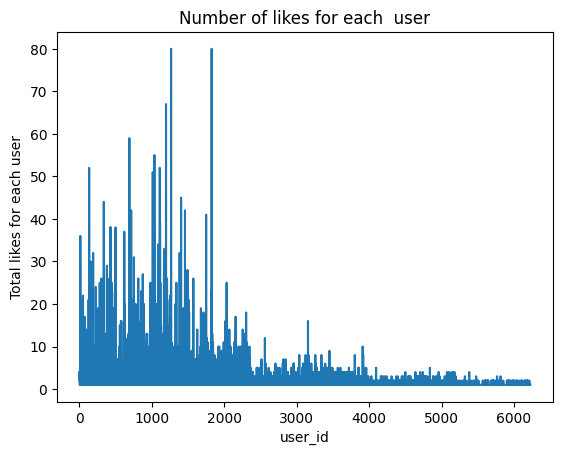

In [4]:
f = plt.figure(1)
g = plt.figure(2)
h = plt.figure(3)
k = plt.figure(4)
x = list (range(len (user_liked_list)))
plt.plot(x, user_liked_list)
plt.xlabel('user_id')
# naming the y axis
plt.ylabel('Total likes for each user')
  
# giving a title to my graph
plt.title('Number of likes for each  user')
f.show()



/tmp/ipykernel_57747/762161004.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


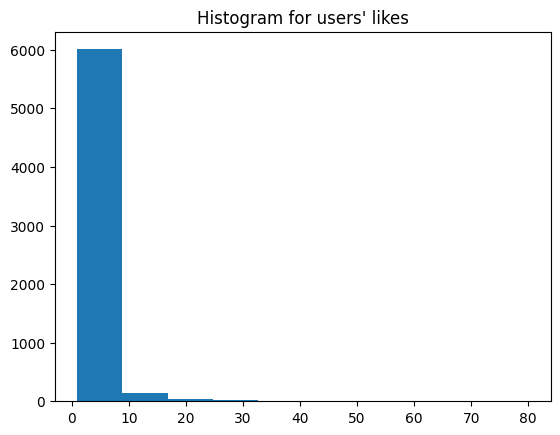

In [5]:
plt.hist(user_liked_list)
plt.title("Histogram for users' likes")
g.show() 

/tmp/ipykernel_57747/3610999592.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()


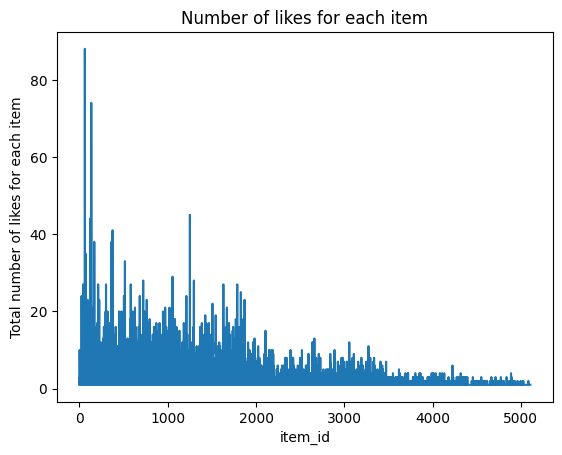

In [6]:
x = list (range(len (item_liked_list)))
plt.plot(x, item_liked_list)
plt.xlabel('item_id')
# naming the y axis
plt.ylabel('Total number of likes for each item')
# giving a title to my graph
plt.title('Number of likes for each item')
# function to show the plot
h.show()

/tmp/ipykernel_57747/2310059604.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  k.show()


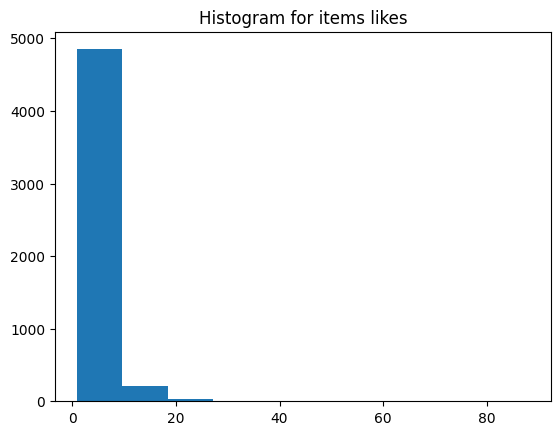

In [7]:
plt.hist(item_liked_list)
plt.title("Histogram for items likes")
k.show()

In [8]:
#users_item_count_df = data.groupby('user_id').size()
#print (users_item_count_df.head())
data_group_user=data.groupby('user_id').size()
data_enough_intraction=data_group_user[data_group_user>=5].reset_index()[['user_id']]
print (data_enough_intraction.head())
print (len(data_group_user))
print (len(data_enough_intraction))
print('# of interactions: %d' % len(data))
selected_df = data.merge(data_enough_intraction, 
               how = 'right',
               left_on = 'user_id',
               right_on = 'user_id')
print('# of interactions: Users have at least 5 interactions: %d' % len(selected_df))


    user_id
0    user10
1  user1003
2  user1004
3  user1008
4  user1012
6226
580
# of interactions: 14491
# of interactions: Users have at least 5 interactions: 6135


In [9]:
selected_df.to_csv('cleandatafile.csv',index=False)